# BUILDING A DENSED MODEL USING KERAS TO PREDICT IMAGES OF OBJECTS USING THE CIFAR DATASET

## loading the Necessary Libraries

In [1]:
# Libraries for data manipulation, visualization and loading the dataset into python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
from os import path
%matplotlib inline

In [2]:
# Libraries for building our model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow import keras

## Loading the cifar dataset into python as train_ds, val_ds and test_ds

In [3]:
file_dir = r'C:\Users\CARNOT\cifar\cifar10\train\airplane'
file_path = file_dir + os.path.sep + '189_airplane.png'

In [4]:
train_ds = image_dataset_from_directory(r'C:\Users\CARNOT\cifar\cifar10\train', image_size=(32, 32), seed=612, validation_split=0.3, subset='training')

Found 50000 files belonging to 10 classes.
Using 35000 files for training.


In [5]:
val_ds = image_dataset_from_directory(r'C:\Users\CARNOT\cifar\cifar10\train', image_size=(32, 32), seed=612, validation_split=0.3, subset='validation')

Found 50000 files belonging to 10 classes.
Using 15000 files for validation.


In [6]:
test_ds = image_dataset_from_directory(r'C:\Users\CARNOT\cifar\cifar10\test', image_size=(32, 32), seed=612)

Found 10000 files belonging to 10 classes.


## Preview the image in the train_ds and the label everytime the for loop is run a different image is being generated

label: tf.Tensor(8, shape=(), dtype=int32)


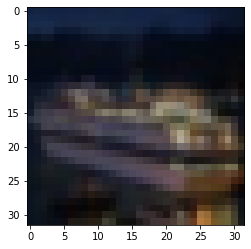

In [7]:
for image, label in train_ds:
    y = label[0]
    plt.imshow(image[0]/255)
    print('label:', label[0])
    break

## Loading the class_label into python

In [8]:
class_label = np.array(open(r'C:\Users\CARNOT\cifar\cifar10\labels.txt').read().splitlines())

In [9]:
class_label[5]

'dog'

## The model makes use of a sequential model by stacking different layers linearly
- The input into the model which was in the range of 0 - 255 was normalize using the **Rescaling** layer
- The input shape is 3-dimensional in order to use the this input with a dense layer the input is flatten using the **Flatten** layer
- Three hidden dense layer with a neuron of 300, 300 and 100 respectively and an activation function of **relu**
- The output was generated as the last layer with 10 neuron and a softmax activation function

In [12]:
model = keras.Sequential()
model.add(layers.Rescaling(1./255, input_shape = (32,32,3)))
model.add(layers.Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Model summary 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 300)               921900    
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,043,310
Trainable params: 1,043,310
No

## Model compilation using Adam as optimizers, sparse_categorical_crossentropy as loss, accuracy as metrics, the model was training using 40 epochs and each epoch as 1094 runs 

In [28]:
model.compile(optimizer=keras.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs=40, validation_data=val_ds)

Epoch 1/40
1094/1094 [==============================] - 566s 513ms/step - loss: 1.9042 - accuracy: 0.3073 - val_loss: 1.7741 - val_accuracy: 0.3535
Epoch 2/40
1094/1094 [==============================] - 795s 721ms/step - loss: 1.7202 - accuracy: 0.3855 - val_loss: 1.7156 - val_accuracy: 0.3787
Epoch 3/40
1094/1094 [==============================] - 579s 527ms/step - loss: 1.6354 - accuracy: 0.4105 - val_loss: 1.6073 - val_accuracy: 0.4239
Epoch 4/40
1094/1094 [==============================] - 582s 529ms/step - loss: 1.5824 - accuracy: 0.4331 - val_loss: 1.6667 - val_accuracy: 0.4041
Epoch 5/40
1094/1094 [==============================] - 666s 606ms/step - loss: 1.5444 - accuracy: 0.4437 - val_loss: 1.5789 - val_accuracy: 0.4320
Epoch 6/40
1094/1094 [==============================] - 679s 615ms/step - loss: 1.5030 - accuracy: 0.4591 - val_loss: 1.5532 - val_accuracy: 0.4508
Epoch 7/40
1094/1094 [==============================] - 556s 506ms/step - loss: 1.4747 - accuracy: 0.4724 - val_

In [30]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 1094}

In [31]:
history.history

{'loss': [1.9041796922683716,
  1.7201708555221558,
  1.6354111433029175,
  1.582448959350586,
  1.5444411039352417,
  1.5029915571212769,
  1.4747072458267212,
  1.4431449174880981,
  1.4204879999160767,
  1.399451494216919,
  1.369408130645752,
  1.3508589267730713,
  1.3253555297851562,
  1.3121525049209595,
  1.2886923551559448,
  1.266309380531311,
  1.249582052230835,
  1.2405872344970703,
  1.221564531326294,
  1.2071162462234497,
  1.1879570484161377,
  1.176931619644165,
  1.1569026708602905,
  1.1442818641662598,
  1.1325427293777466,
  1.1181720495224,
  1.0962464809417725,
  1.093075156211853,
  1.081420660018921,
  1.0558325052261353,
  1.0513145923614502,
  1.0453780889511108,
  1.0349661111831665,
  1.0236907005310059,
  1.0142441987991333,
  0.9980206489562988,
  0.9829750061035156,
  0.9798172116279602,
  0.9711115956306458,
  0.9543758034706116],
 'accuracy': [0.30731427669525146,
  0.3855142891407013,
  0.41048571467399597,
  0.43308570981025696,
  0.4437142908573150

<AxesSubplot:>

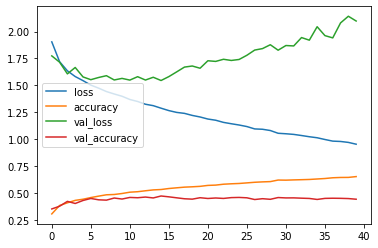

In [34]:
# Checking the performance of our model
pd.DataFrame(history.history).plot()

In [35]:
# evaluating the model on the test data
model.evaluate(test_ds)

313/313 [==============================] - 122s 371ms/step - loss: 2.0311 - accuracy: 0.4485


[2.0310769081115723, 0.44850000739097595]

In [43]:
# generation some input from the test_ds to be used in predicting 
for img, lb in test_ds:
    print(img[:4].shape)
    print(lb[:4].shape)
    image = img[:4]
    label = lb[:4]
    break

(4, 32, 32, 3)
(4,)


In [45]:
# running a prediction on the model
prob_predict = model.predict(image)

In [48]:
# predicted label
predict = class_label[prob_predict.argmax(axis = 1)]
predict

array(['dog', 'deer', 'dog', 'truck'], dtype='<U10')

In [53]:
# actual label
actual_label = class_label[np.array(label)]
actual_label

array(['dog', 'deer', 'horse', 'dog'], dtype='<U10')

In [55]:
# weights and biases of the first dense layer
model.layers[2].get_weights()

[array([[-2.60950904e-02, -2.63698753e-02,  2.68406868e-02, ...,
          1.22417927e-01, -4.44985405e-02, -1.13394083e-02],
        [-3.13659497e-02, -1.86714586e-02, -3.52070071e-02, ...,
          1.20468535e-01,  6.07513539e-05,  9.65113472e-03],
        [-8.15506000e-03, -3.80092375e-02, -3.07999784e-03, ...,
          6.27948999e-01,  2.08293460e-02,  1.99701581e-02],
        ...,
        [ 5.96103352e-03, -3.96754332e-02, -4.66282107e-03, ...,
         -1.50388092e-01, -1.28507577e-02, -3.39771360e-02],
        [-6.57599093e-03, -3.77745926e-02, -3.02913096e-02, ...,
         -2.41550878e-01,  3.38570513e-02,  1.34094637e-02],
        [-1.80551987e-02,  3.60735916e-02, -6.63135340e-03, ...,
         -3.27629596e-01, -2.00156402e-02, -3.31095420e-02]], dtype=float32),
 array([-2.7262277e-03, -5.9995563e-03, -2.9328512e-03, -5.9883334e-03,
        -4.4228504e-03,  1.5413033e+00, -4.2088493e-03, -6.6208933e-03,
        -2.1069276e-03, -5.9963623e-03, -6.0012247e-03, -6.2797377e-03

In [56]:
# Saving my model
model.save('cifar.hf5')

INFO:tensorflow:Assets written to: cifar.hf5\assets
